In [266]:
import torch
from skinbot.models import get_model, PlainLayer
from skinbot.dataset import * 
from skinbot.config import read_config, Config
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [267]:
import umap

In [268]:
# path_to_model = "/home/doom/Documents/Phd/models/best_models/best_fold=0_resnet101_cropSingle_model_90_accuracy=0.9510.pt"
path_to_model = "/home/doom/Documents/Phd/models/skin/resnet_v1/best_fold=0_resnet101_cropSingle_model_70_accuracy=0.8776.pt"
config = read_config()
C = Config().set_config(config)

In [269]:
model = get_model('resnet101', freeze='layer4.2.conv3')
# model

In [270]:
# model.load_state_dict(torch.load(path_to_model))

In [271]:
# # model.fc[1] = PlainLayer()
# model.fc[2] = PlainLayer()
# model.fc[3] = PlainLayer()
# model.fc.pop(3)
model.fc = PlainLayer()
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [276]:
# all_dataloader = get_dataloaders(config, batch=16, mode='all', target='cropSingle')
all_dataloader = get_dataloaders(config, batch=16, mode='all', target='cropSingle')


# debugging (look samples)

In [277]:
from skimage.color import rgb2hsv

In [279]:
for x, y in all_dataloader:
    break

0 ===  ./data/images/Bland_100_IMAGIC_1701200262250.JPG
1 ===  ./data/images/Bland_101_IMAGIC_1803200376370.JPG
2 ===  ./data/images/Bland_102_IMAGIC_1508030124899.JPG
3 ===  ./data/images/Bland_103_IMAGIC_2202160695097.JPG
4 ===  ./data/images/Bland_104_TP0_IMAGIC_2202160695098.JPG
5 ===  ./data/images/Bland_104_TP1_IMAGIC_1904150481453.JPG
6 ===  ./data/images/Bland_105_IMAGIC_2202160695100.JPG
7 ===  ./data/images/BLAND_10_IMAGIC_1903280475330 (2).JPG
8 ===  ./data/images/BLAND_14_TP0_A1_IMAGIC_1806040401810.JPG
9 ===  ./data/images/BLAND_11_IMAGIC_1506030107297.JPG
10 ===  ./data/images/BLAND_12_TP1_IMAGIC_1903070469594.JPG
11 ===  ./data/images/BLAND_13_TP0_A1_IMAGIC_1503180090839.JPG
12 ===  ./data/images/BLAND_13_TP0_A2_IMAGIC_1503180090842.JPG
13 ===  ./data/images/BLAND_13_TP0_A3_IMAGIC_1503180090847.JPG
14 ===  ./data/images/BLAND_13_TP0_A4_IMAGIC_1503180090849.JPG
15 ===  ./data/images/BLAND_13_TP1_A1_IMAGIC_1504300099129.JPG


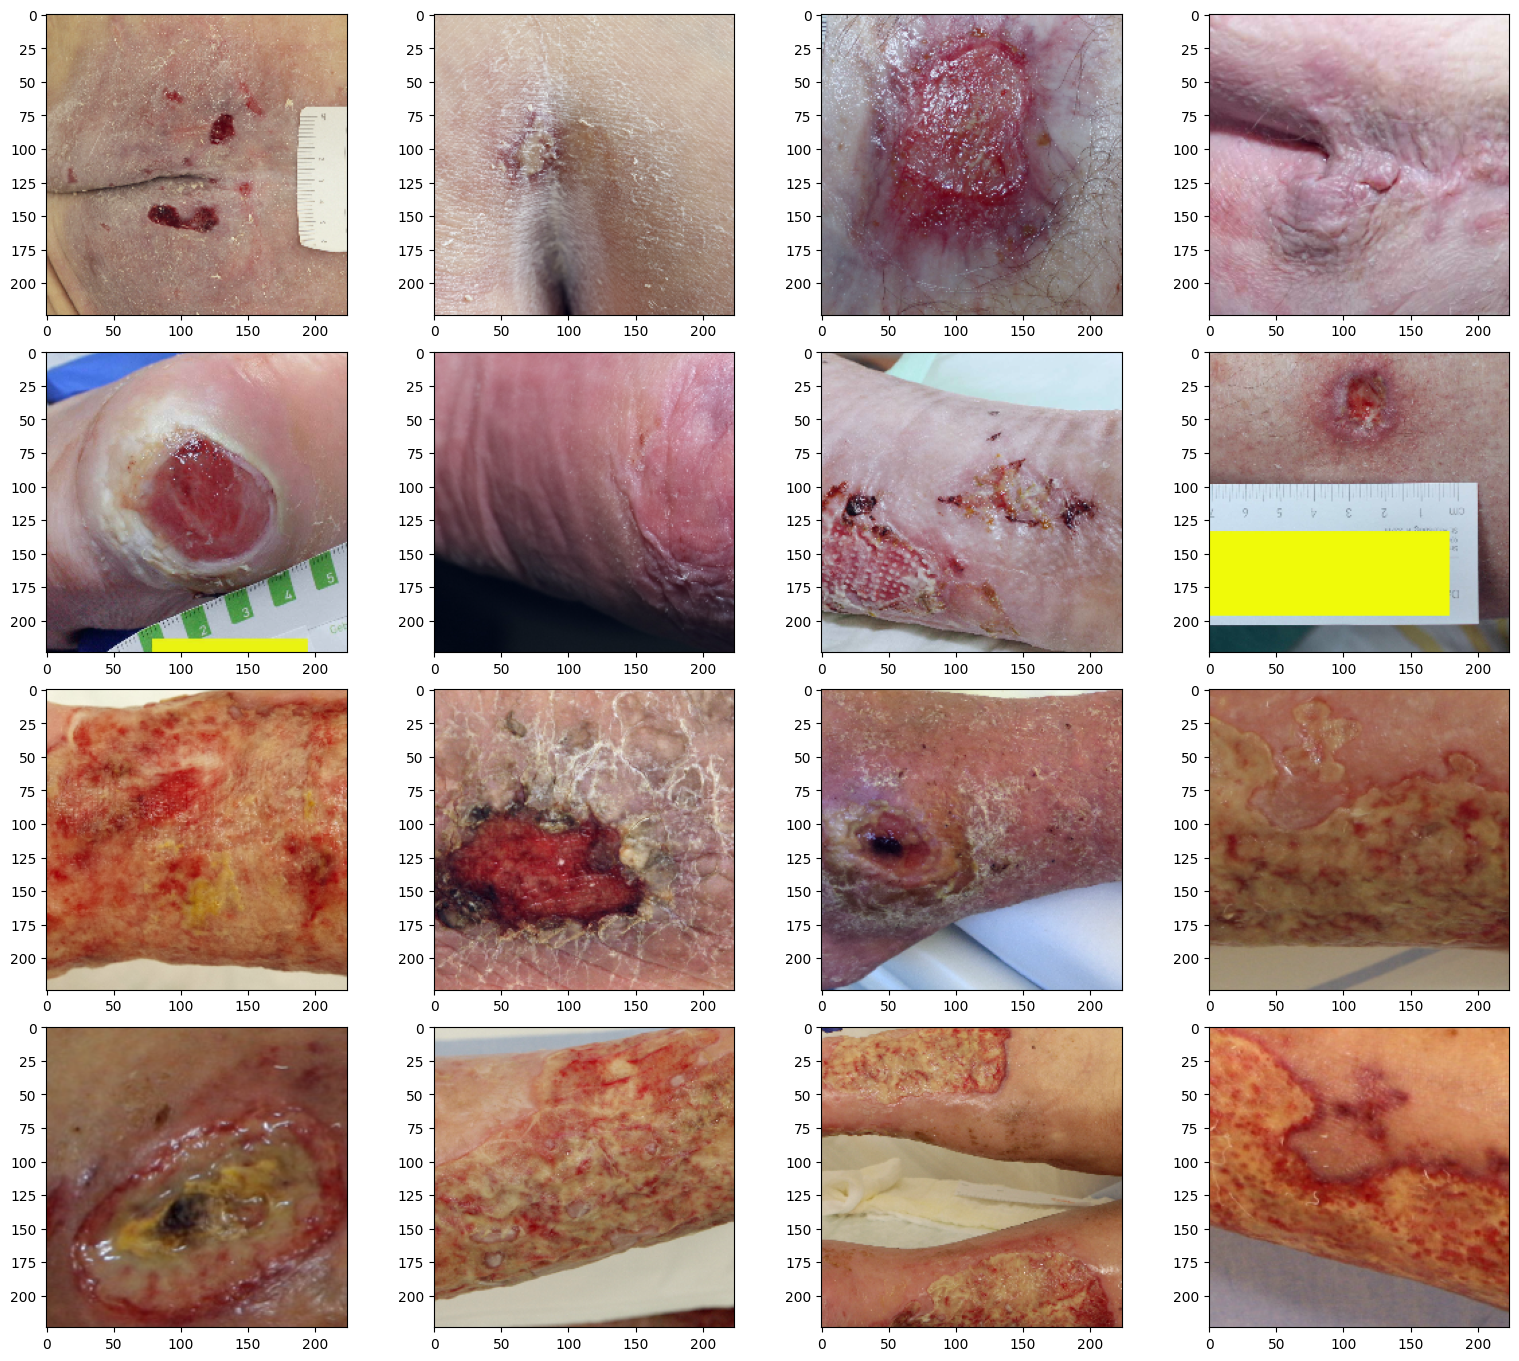

In [280]:


fig, axs = plt.subplots(ncols=4, nrows=4, figsize=(15.5, 13.5),
                        layout="constrained")

for i in range(4):
    for j in range(4):
        img = x[4*i+j].numpy()
        img = (img -img.min())/(img.max()-img.min())
        axs[i,j].imshow(img.transpose(1,2,0))
    

# Predicting

In [ ]:
features = []
labels = []
N = 5
i = 0
for x, y in all_dataloader:
    with torch.no_grad():
        print(x.shape)
        pred = model(x)
    features.append(pred)
    labels.append(y)
    i += 1
#     if i>=N:
#         break


In [291]:
# a = {
#     'contact' :  0,
#     'vasculitis' :  1,
#     'necrosis' :  2,
#     'malignant' :  3,
#     'pyoderma': 4, 
#     'infection' :  5,
#     'bland' : 6
# }
# b = {
#     0 :  0,
#     1 :  0,
#     2 :  0,
#     3 :  1,
#     4:   0, 
#     5 :  1,
#     6 :  0
# }

a = {
    'normal' :  0,
    'infected' :  1
}
b = {
    0 :  0,
    1 :  1
}
c = {
    0: 'normal',
    1: 'infected'
}


In [39]:
penguin_data = []
penguin_labels = []
for pred_batch, label_batch in zip(features, labels):
    print(pred_batch.shape)
    for p in pred_batch:
        penguin_data.append(p.numpy())
    for p in label_batch:
        L = p.numpy()
        L = b[int(L)]
        penguin_labels.append(L)
penguin_data = np.array(penguin_data)
penguin_labels = np.array(penguin_labels)

torch.Size([16, 2048])
torch.Size([16, 2048])
torch.Size([16, 2048])
torch.Size([16, 2048])
torch.Size([16, 2048])
torch.Size([16, 2048])
torch.Size([16, 2048])
torch.Size([16, 2048])
torch.Size([16, 2048])
torch.Size([16, 2048])
torch.Size([16, 2048])
torch.Size([16, 2048])
torch.Size([16, 2048])
torch.Size([16, 2048])
torch.Size([16, 2048])
torch.Size([16, 2048])
torch.Size([16, 2048])
torch.Size([16, 2048])
torch.Size([16, 2048])
torch.Size([16, 2048])
torch.Size([16, 2048])
torch.Size([16, 2048])
torch.Size([16, 2048])
torch.Size([16, 2048])
torch.Size([16, 2048])
torch.Size([16, 2048])
torch.Size([16, 2048])
torch.Size([16, 2048])
torch.Size([16, 2048])
torch.Size([16, 2048])
torch.Size([5, 2048])


# dominant colors

In [292]:
import matplotlib.image as img
import matplotlib.pyplot as plt
from scipy.cluster.vq import whiten
from scipy.cluster.vq import kmeans
import pandas as pd


def get_dominant_color(batman_image):

    r = []
    g = []
    b = []
#     batman_image = 255*(batman_image-batman_image.min())/(batman_image.max()-batman_image.min())
    batman_image = batman_image.transpose(0,2).transpose(0,1).numpy()
    M,N,C = batman_image.shape
    batman_image.reshape(M*N,C)
    for row in batman_image:
        for temp_r, temp_g, temp_b in row:
            r.append(temp_r)
            g.append(temp_g)
            b.append(temp_b)

    batman_df = pd.DataFrame({'red' : r,
                            'green' : g,
                            'blue' : b})
    batman_df['scaled_color_red'] = whiten(batman_df['red'])
    batman_df['scaled_color_blue'] = whiten(batman_df['blue'])
    batman_df['scaled_color_green'] = whiten(batman_df['green'])

    cluster_centers, _ = kmeans(batman_df[['scaled_color_red',
                                        'scaled_color_blue',
                                        'scaled_color_green']], 3)

    dominant_colors = []

#     red_std, green_std, blue_std = batman_df[['red',
#                                             'green',
#                                             'blue']].std()
#     print('number of clusters= ', len(cluster_centers))

    for cluster_center in cluster_centers:
        cluster_center = (cluster_center - cluster_center.min())/(cluster_center.max()-cluster_center.min())
        red_scaled, green_scaled, blue_scaled = cluster_center
        dominant_colors.append((
            red_scaled,
            green_scaled,
            blue_scaled
        ))
    if len(dominant_colors) == 1:
        dominant_colors.append(dominant_colors[0])
        dominant_colors.append(dominant_colors[0])
    if len(dominant_colors) == 2:
#         print('asdfasdfsda', dominant_colors[0],dominant_colors[1])
        aux = (np.array(dominant_colors[0]) + np.array(dominant_colors[1]))/2
        dominant_colors.append(aux)
#     plt.imshow([dominant_colors])
#     plt.show()
    return dominant_colors


In [282]:
# for xx in x:
#         dominant_colors.append(get_dominant_color(xx))
# # a = xx.transpose(0,2).transpose(0,1).numpy()

In [283]:
# a[0,0].shape

In [284]:
features_2 = []
labels_2 = []
N = 5
i = 0
for x, y in all_dataloader:
    dominant_colors = []
    for xx in x:
        dominant_colors.append(get_dominant_color(xx))
    pred = np.array(dominant_colors)
    features_2.append(pred)
    labels_2.append(y)
    i += 1

0 ===  ./data/images/Bland_100_IMAGIC_1701200262250.JPG
1 ===  ./data/images/Bland_101_IMAGIC_1803200376370.JPG
2 ===  ./data/images/Bland_102_IMAGIC_1508030124899.JPG
3 ===  ./data/images/Bland_103_IMAGIC_2202160695097.JPG
4 ===  ./data/images/Bland_104_TP0_IMAGIC_2202160695098.JPG
5 ===  ./data/images/Bland_104_TP1_IMAGIC_1904150481453.JPG
6 ===  ./data/images/Bland_105_IMAGIC_2202160695100.JPG
7 ===  ./data/images/BLAND_10_IMAGIC_1903280475330 (2).JPG
8 ===  ./data/images/BLAND_14_TP0_A1_IMAGIC_1806040401810.JPG
9 ===  ./data/images/BLAND_11_IMAGIC_1506030107297.JPG
10 ===  ./data/images/BLAND_12_TP1_IMAGIC_1903070469594.JPG
11 ===  ./data/images/BLAND_13_TP0_A1_IMAGIC_1503180090839.JPG
12 ===  ./data/images/BLAND_13_TP0_A2_IMAGIC_1503180090842.JPG
13 ===  ./data/images/BLAND_13_TP0_A3_IMAGIC_1503180090847.JPG
14 ===  ./data/images/BLAND_13_TP0_A4_IMAGIC_1503180090849.JPG
15 ===  ./data/images/BLAND_13_TP1_A1_IMAGIC_1504300099129.JPG
16 ===  ./data/images/BLAND_13_TP1_A2_IMAGIC_1504

138 ===  ./data/images/CONTACT_DERMATITIS_13_IMAGIC_2011270620258.JPG
139 ===  ./data/images/CONTACT_DERMATITIS_14_IMAGIC_2011270620272.JPG
140 ===  ./data/images/CONTACT_DERMATITIS_15_IMAGIC_2201240688310.jpg
141 ===  ./data/images/CONTACT_DERMATITIS_16_IMAGIC_1812120445142.JPG
142 ===  ./data/images/CONTACT_DERMATITIS_17_IMAGIC_2001160550883.JPG
143 ===  ./data/images/Bland_88_TP0_IMAGIC_1506030107292.JPG
144 ===  ./data/images/Bland_88_TP2_IMAGIC_1611300249088.JPG
145 ===  ./data/images/Bland_94_IMAGIC_2202160694932.JPG
146 ===  ./data/images/CONTACT_DERMATITIS_20_IMAGIC_1707100310171.JPG
147 ===  ./data/images/CONTACT_DERMATITIS_21_IMAGIC_2201200688146.jpg
148 ===  ./data/images/Contact_Dermatitis_2_4146839_11942094_S_Nr_001_002.JPG
149 ===  ./data/images/Contact_Dermatitis_4_A2_IMAGIC_1905310497389.JPG
150 ===  ./data/images/Contact_Dermatitis_4_A3_IMAGIC_1905310497392.JPG
151 ===  ./data/images/Contact_Dermatitis_4_A4_IMAGIC_1905310497396.JPG
152 ===  ./data/images/Contact_Dermat

264 ===  ./data/images/Malignant_151_IMAGIC_2007090584482.JPG
265 ===  ./data/images/Malignant_152_4774506_ 2_IMAGIC_1905160491446.JPG
266 ===  ./data/images/MALIGNANT_15_IMAGIC_2002170557988.JPG
267 ===  ./data/images/MALIGNANT_16_IMAGIC_1408260051159.JPG
268 ===  ./data/images/MALIGNANT_17_IMAGIC_1711130346151.JPG
269 ===  ./data/images/INFECTION_5_IMAGIC_2111030676679.JPG
270 ===  ./data/images/Infection_71_IMAGIC_2202160695099.JPG
271 ===  ./data/images/Infection_80_TP1_A2_IMAGIC_1608220210219.JPG
272 ===  ./data/images/Infection_87_A1_TP0_IMAGIC_1911260540357.JPG
273 ===  ./data/images/MALIGNANT_18_IMAGIC_1811220442171.JPG
274 ===  ./data/images/MALIGNANT_19_IMAGIC_1802070361540.JPG
275 ===  ./data/images/Malignant_1_IMAGIC_2110200674485.JPG
276 ===  ./data/images/MALIGNANT_21_IMAGIC_1803220377754.JPG
277 ===  ./data/images/MALIGNANT_22_IMAGIC_2008060591169.JPG
278 ===  ./data/images/MALIGNANT_23_IMAGIC_1905310497518.JPG
279 ===  ./data/images/Malignant_2_IMAGIC_1704240282633.JPG


391 ===  ./data/images/MALIGNANT_11_IMAGIC_1605310176443.JPG
392 ===  ./data/images/Malignant_133_A2_IMAGIC_2101270627762.JPG
393 ===  ./data/images/Malignant_134_A1_IMAGIC_2002270560713.jpg
394 ===  ./data/images/Malignant_125_TP0_IMAGIC_2011100614557.JPG
395 ===  ./data/images/Malignant_125_TP1_IMAGIC_2102040630192.JPG
396 ===  ./data/images/Malignant_125_TP2_IMAGIC_2105250648801.JPG
397 ===  ./data/images/Malignant_126_4518748_13676048_S_Nr_001_020.JPG
398 ===  ./data/images/Malignant_127_IMAGIC_1609020224671.JPG
399 ===  ./data/images/Malignant_128_IMAGIC_1602290163213.JPG
400 ===  ./data/images/Malignant_135_IMAGIC_2208110721160.JPG
401 ===  ./data/images/Malignant_136_A1_IMAGIC_2208110721161.JPG
402 ===  ./data/images/Malignant_138_IMAGIC_1904050480108.JPG
403 ===  ./data/images/Malignant_139_IMAGIC_2102020629965.JPG
404 ===  ./data/images/Malignant_140_IMAGIC_1810160431656.JPG
405 ===  ./data/images/Malignant_141_TP0_IMAGIC_1809270428020.JPG
406 ===  ./data/images/Malignant_141_

In [285]:
penguin_data = []
penguin_labels = []
for pred_batch, label_batch in zip(features_2, labels_2):
#     print(pred_batch.shape)
    for p in pred_batch:
        penguin_data.append(np.exp(p.max(axis=1)))
    for p in label_batch:
        L = p
        L = b[int(L)]
        penguin_labels.append(L)
penguin_data = np.array(penguin_data)
penguin_labels = np.array(penguin_labels)
print('penguin_data.shape', penguin_data.shape)
print('penguin_labels.shape', penguin_labels.shape)

penguin_data.shape (462, 3)
penguin_labels.shape (462,)


In [286]:
reducer = umap.UMAP()


In [287]:
scaled_penguin_data = StandardScaler().fit_transform(scaled_penguin_data)


In [288]:
embedding = reducer.fit_transform(penguin_data)
embedding.shape

(462, 2)

In [289]:
sum(penguin_labels==1)



96

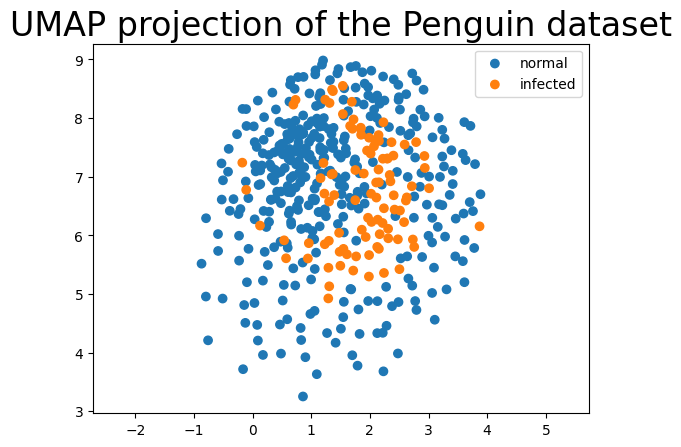

In [293]:
for i in range(len(a)):
    plt.scatter(
        embedding[penguin_labels == i, 0],
        embedding[penguin_labels == i, 1],
        c=[sns.color_palette()[x] for x in penguin_labels if x == i], label=c[i])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Penguin dataset', fontsize=24);
plt.legend()
plt.show()

# Test SVM

In [310]:
X, y = penguin_data, penguin_labels

In [311]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score



In [312]:
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [313]:
num_correct = sum(clf.predict(X) == y)
acc = num_correct/len(y)
print('accuracy = ', acc)

accuracy =  0.7922077922077922


In [314]:
cross_val_score(clf, X, y, cv=10)

array([0.78723404, 0.78723404, 0.80434783, 0.80434783, 0.80434783,
       0.80434783, 0.7826087 , 0.7826087 , 0.7826087 , 0.7826087 ])

# test random forest

In [315]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [316]:
clf_2 = make_pipeline(StandardScaler(),DecisionTreeClassifier(random_state=0))
clf_2.fit(X,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=0))])

In [317]:
num_correct = sum(clf_2.predict(X) == y)
acc = num_correct/len(y)
print('accuracy = ', acc)

accuracy =  0.7922077922077922


In [318]:
cross_val_score(clf_2, X, y, cv=5)

array([0.79569892, 0.78494624, 0.79347826, 0.79347826, 0.79347826])

In [319]:
clf_3 = make_pipeline(StandardScaler(),
                  RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0))
clf_3.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(n_estimators=10, random_state=0))])

In [320]:
num_correct = sum(clf_3.predict(X) == y)
acc = num_correct/len(y)
print('accuracy = ', acc)

accuracy =  0.7922077922077922


In [321]:
cross_val_score(clf_3, X, y, cv=5)

array([0.79569892, 0.78494624, 0.79347826, 0.79347826, 0.79347826])

In [322]:
clf_4 =make_pipeline(StandardScaler(),MLPClassifier(random_state=1, max_iter=3000))
clf_4.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpclassifier',
                 MLPClassifier(max_iter=3000, random_state=1))])

In [323]:
num_correct = sum(clf_4.predict(X) == y)
acc = num_correct/len(y)
print('accuracy = ', acc)

accuracy =  0.7922077922077922


In [324]:
cross_val_score(clf_4, X, y, cv=5)

array([0.79569892, 0.78494624, 0.79347826, 0.79347826, 0.79347826])

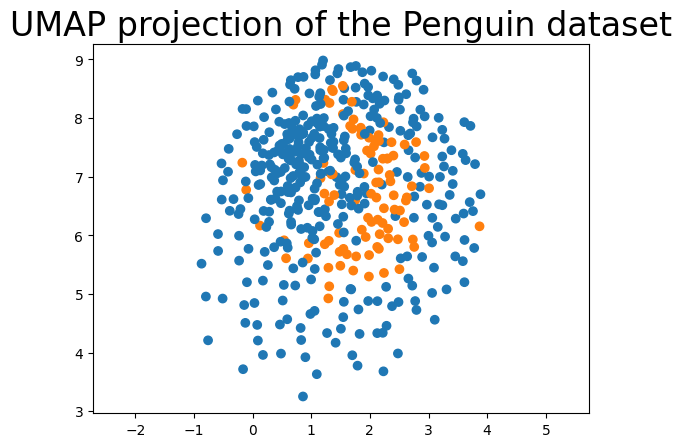

In [309]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in penguin_labels])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Penguin dataset', fontsize=24);
plt.show()